<a href="https://colab.research.google.com/github/Alexiserges/Feature-Selection/blob/main/Principal_Component_Analysis_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Principal component analysis (PCA) is a popular technique for analyzing large datasets containing a high number of dimensions/features per observation, increasing the interpretability of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data. 
Formally, PCA is a statistical technique for reducing the dimensionality of a dataset. This is accomplished by linearly transforming the data into a new coordinate system where (most of) the variation in the data can be described with fewer dimensions than the initial data. Many studies use the first two principal components in order to plot the data in two dimensions and to visually identify clusters of closely related data points. Principal component analysis has applications in many fields such as population genetics, microbiome studies, and atmospheric science

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('Dataset.csv')

In [3]:
df.head()

,COUNTY,DATE,TOTAL_CASES,NEW_CASES,TOTAL_CONFIRMED,NEW_CONFIRMED,TOTAL_PROBABLE,NEW_PROBABLE,POS_TESTS,NEW_POS_TESTS,NEG_TESTS,NEW_NEG_TESTS,TOTAL_TESTS,NEW_TESTS,NEW_DEATHS,TOTAL_DEATHS,NEW_HOSPITALIZED,TOTAL_HOSPITALIZED,TOTAL_DEATHS_BY_DOD,NEW_DEATHS_BY_DOD
0,Anderson,10/12/2022,26624,2,16211,1,10413,1,17646,1,94584,7,112230,8,0,381,0,385,381,0
1,Bedford,10/12/2022,17298,5,12508,5,4790,0,13873,5,53100,11,66973,16,0,246,0,335,246,0
2,Benton,10/12/2022,5424,0,3154,0,2270,0,3367,0,15084,6,18451,6,0,101,0,129,101,0
3,Bledsoe,10/12/2022,5220,0,3827,0,1393,0,4061,0,24075,1,28136,1,0,63,0,100,63,0
4,Blount,10/12/2022,46919,5,37075,3,9844,2,39618,3,138816,25,178434,28,0,502,0,963,501,0


In [4]:
df.isnull().sum()

COUNTY                 0
DATE                   0
TOTAL_CASES            0
NEW_CASES              0
TOTAL_CONFIRMED        0
NEW_CONFIRMED          0
TOTAL_PROBABLE         0
NEW_PROBABLE           0
POS_TESTS              0
NEW_POS_TESTS          0
NEG_TESTS              0
NEW_NEG_TESTS          0
TOTAL_TESTS            0
NEW_TESTS              0
NEW_DEATHS             0
TOTAL_DEATHS           0
NEW_HOSPITALIZED       0
TOTAL_HOSPITALIZED     0
TOTAL_DEATHS_BY_DOD    0
NEW_DEATHS_BY_DOD      0
dtype: int64

In [5]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [6]:
for feature in ['TOTAL_PROBABLE','NEW_PROBABLE','POS_TESTS','NEW_POS_TESTS','NEG_TESTS','NEW_NEG_TESTS','TOTAL_TESTS','NEW_TESTS',
'NEW_DEATHS', 'TOTAL_DEATHS' , 'NEW_HOSPITALIZED', 'TOTAL_HOSPITALIZED', 'TOTAL_DEATHS_BY_DOD', 'NEW_DEATHS_BY_DOD']:
    impute_nan(df,feature)

In [7]:
df.isnull().mean()

COUNTY                 0.0
DATE                   0.0
TOTAL_CASES            0.0
NEW_CASES              0.0
TOTAL_CONFIRMED        0.0
NEW_CONFIRMED          0.0
TOTAL_PROBABLE         0.0
NEW_PROBABLE           0.0
POS_TESTS              0.0
NEW_POS_TESTS          0.0
NEG_TESTS              0.0
NEW_NEG_TESTS          0.0
TOTAL_TESTS            0.0
NEW_TESTS              0.0
NEW_DEATHS             0.0
TOTAL_DEATHS           0.0
NEW_HOSPITALIZED       0.0
TOTAL_HOSPITALIZED     0.0
TOTAL_DEATHS_BY_DOD    0.0
NEW_DEATHS_BY_DOD      0.0
dtype: float64

In [8]:
df.keys()

Index(['COUNTY', 'DATE', 'TOTAL_CASES', 'NEW_CASES', 'TOTAL_CONFIRMED',
       'NEW_CONFIRMED', 'TOTAL_PROBABLE', 'NEW_PROBABLE', 'POS_TESTS',
       'NEW_POS_TESTS', 'NEG_TESTS', 'NEW_NEG_TESTS', 'TOTAL_TESTS',
       'NEW_TESTS', 'NEW_DEATHS', 'TOTAL_DEATHS', 'NEW_HOSPITALIZED',
       'TOTAL_HOSPITALIZED', 'TOTAL_DEATHS_BY_DOD', 'NEW_DEATHS_BY_DOD'],
      dtype='object')

In [9]:
print(df.describe)

<bound method NDFrame.describe of            COUNTY        DATE  TOTAL_CASES  NEW_CASES  TOTAL_CONFIRMED  \
0        Anderson  10/12/2022        26624          2            16211   
1         Bedford  10/12/2022        17298          5            12508   
2          Benton  10/12/2022         5424          0             3154   
3         Bledsoe  10/12/2022         5220          0             3827   
4          Blount  10/12/2022        46919          5            37075   
...           ...         ...          ...        ...              ...   
97383       Wayne   12/3/2020            0          0                0   
97384     Weakley   12/3/2020            0          0                0   
97385       White   12/3/2020            0          0                0   
97386  Williamson   12/3/2020            0          0                0   
97387      Wilson   12/3/2020            0          0                0   

       NEW_CONFIRMED  TOTAL_PROBABLE  NEW_PROBABLE  POS_TESTS  NEW_POS_TESTS 

In [10]:
numerical_lst=['int16','int32', 'int64', 'float16','float32','float64' ]
numerical_cols= list(df.select_dtypes(include=numerical_lst).columns)

In [11]:
numerical_cols

['TOTAL_CASES',
 'NEW_CASES',
 'TOTAL_CONFIRMED',
 'NEW_CONFIRMED',
 'TOTAL_PROBABLE',
 'NEW_PROBABLE',
 'POS_TESTS',
 'NEW_POS_TESTS',
 'NEG_TESTS',
 'NEW_NEG_TESTS',
 'TOTAL_TESTS',
 'NEW_TESTS',
 'NEW_DEATHS',
 'TOTAL_DEATHS',
 'NEW_HOSPITALIZED',
 'TOTAL_HOSPITALIZED',
 'TOTAL_DEATHS_BY_DOD',
 'NEW_DEATHS_BY_DOD']

In [12]:
df=df[numerical_cols]
df.head()

,TOTAL_CASES,NEW_CASES,TOTAL_CONFIRMED,NEW_CONFIRMED,TOTAL_PROBABLE,NEW_PROBABLE,POS_TESTS,NEW_POS_TESTS,NEG_TESTS,NEW_NEG_TESTS,TOTAL_TESTS,NEW_TESTS,NEW_DEATHS,TOTAL_DEATHS,NEW_HOSPITALIZED,TOTAL_HOSPITALIZED,TOTAL_DEATHS_BY_DOD,NEW_DEATHS_BY_DOD
0,26624,2,16211,1,10413,1,17646,1,94584,7,112230,8,0,381,0,385,381,0
1,17298,5,12508,5,4790,0,13873,5,53100,11,66973,16,0,246,0,335,246,0
2,5424,0,3154,0,2270,0,3367,0,15084,6,18451,6,0,101,0,129,101,0
3,5220,0,3827,0,1393,0,4061,0,24075,1,28136,1,0,63,0,100,63,0
4,46919,5,37075,3,9844,2,39618,3,138816,25,178434,28,0,502,0,963,501,0


In [23]:
### It is always a good practice to split train and test data to avoid
#overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['NEW_CASES'], axis=1),
    df['NEW_CASES'],
    test_size=0.3,
    random_state=0)

In [24]:
X_train

,TOTAL_CASES,TOTAL_CONFIRMED,NEW_CONFIRMED,TOTAL_PROBABLE,NEW_PROBABLE,POS_TESTS,NEW_POS_TESTS,NEG_TESTS,NEW_NEG_TESTS,TOTAL_TESTS,NEW_TESTS,NEW_DEATHS,TOTAL_DEATHS,NEW_HOSPITALIZED,TOTAL_HOSPITALIZED,TOTAL_DEATHS_BY_DOD,NEW_DEATHS_BY_DOD
74166,1873,1823,22,50,1,2135,22,22375,107,24510,129,0,41,0,105,50,0
63411,750,499,0,251,0,598,0,3415,25,4013,25,0,23,0,57,23,0
43287,7431,6020,15,1411,18,6907,15,40988,60,47895,75,0,94,3,158,115,1
45024,2956,1662,6,1294,11,1872,8,8411,20,10283,28,0,54,1,47,63,0
86573,138,138,14,0,0,166,24,2902,54,3068,78,0,5,1,18,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,22301,14241,6,8060,2,15565,6,88926,18,104491,24,0,334,0,378,341,0
45891,5286,3925,10,1361,10,4367,13,28576,67,32943,80,0,56,0,156,62,0
42613,2658,2186,7,472,6,2469,5,10688,2,13157,7,1,37,0,98,51,0
43567,6591,3959,21,2632,14,4364,29,25107,86,29471,115,0,103,0,143,133,1


In [25]:
X_train.isnull().sum()

TOTAL_CASES            0
TOTAL_CONFIRMED        0
NEW_CONFIRMED          0
TOTAL_PROBABLE         0
NEW_PROBABLE           0
POS_TESTS              0
NEW_POS_TESTS          0
NEG_TESTS              0
NEW_NEG_TESTS          0
TOTAL_TESTS            0
NEW_TESTS              0
NEW_DEATHS             0
TOTAL_DEATHS           0
NEW_HOSPITALIZED       0
TOTAL_HOSPITALIZED     0
TOTAL_DEATHS_BY_DOD    0
NEW_DEATHS_BY_DOD      0
dtype: int64

In [26]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.10037711, 0.09764282, 0.24042783, 0.08211707, 0.21505665,
       0.09642036, 0.22831002, 0.07841443, 0.08606131, 0.08455187,
       0.10665272, 0.04270963, 0.08620957, 0.13060549, 0.09200215,
       0.08998642, 0.12266126])

In [27]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

NEW_CONFIRMED          0.240428
NEW_POS_TESTS          0.228310
NEW_PROBABLE           0.215057
NEW_HOSPITALIZED       0.130605
NEW_DEATHS_BY_DOD      0.122661
NEW_TESTS              0.106653
TOTAL_CASES            0.100377
TOTAL_CONFIRMED        0.097643
POS_TESTS              0.096420
TOTAL_HOSPITALIZED     0.092002
TOTAL_DEATHS_BY_DOD    0.089986
TOTAL_DEATHS           0.086210
NEW_NEG_TESTS          0.086061
TOTAL_TESTS            0.084552
TOTAL_PROBABLE         0.082117
NEG_TESTS              0.078414
NEW_DEATHS             0.042710
dtype: float64

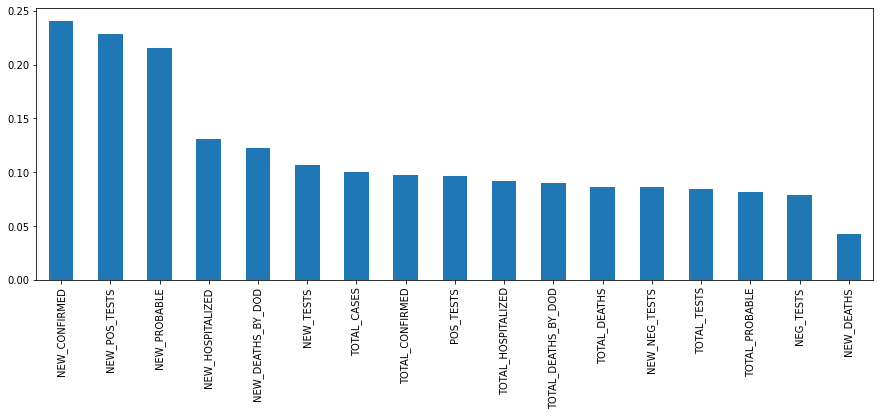

In [28]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [29]:
from sklearn.feature_selection import SelectPercentile

In [30]:
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train, y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x7fd601202b80>)

In [31]:
selected_top_columns.get_support()

array([False, False,  True, False,  True, False,  True, False, False,
       False, False, False, False,  True, False, False, False])

In [32]:
X_train.columns[selected_top_columns.get_support()]

Index(['NEW_CONFIRMED', 'NEW_PROBABLE', 'NEW_POS_TESTS', 'NEW_HOSPITALIZED'], dtype='object')

In [33]:
#Define the dependent variable that needs to be predicted (labels)
y = df["NEW_CASES"].values

In [34]:
X= df.drop(["NEW_CASES"], axis=1)

In [35]:
X.head()

,TOTAL_CASES,TOTAL_CONFIRMED,NEW_CONFIRMED,TOTAL_PROBABLE,NEW_PROBABLE,POS_TESTS,NEW_POS_TESTS,NEG_TESTS,NEW_NEG_TESTS,TOTAL_TESTS,NEW_TESTS,NEW_DEATHS,TOTAL_DEATHS,NEW_HOSPITALIZED,TOTAL_HOSPITALIZED,TOTAL_DEATHS_BY_DOD,NEW_DEATHS_BY_DOD
0,26624,16211,1,10413,1,17646,1,94584,7,112230,8,0,381,0,385,381,0
1,17298,12508,5,4790,0,13873,5,53100,11,66973,16,0,246,0,335,246,0
2,5424,3154,0,2270,0,3367,0,15084,6,18451,6,0,101,0,129,101,0
3,5220,3827,0,1393,0,4061,0,24075,1,28136,1,0,63,0,100,63,0
4,46919,37075,3,9844,2,39618,3,138816,25,178434,28,0,502,0,963,501,0


In [36]:
feature_names = np.array(X.columns) 

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [38]:
##Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [39]:
# Define XGBOOST classifier to be used by Boruta
import xgboost as xgb
#model = xgb.XGBClassifier()  #For Boruta
from sklearn.ensemble import RandomForestRegressor

Create shadow features – random features and shuffle values in columns Train Random Forest / XGBoost and calculate feature importance via mean decrease impurity Check if real features have higher importance compared to shadow features Repeat this for every iteration If original feature performed better, then mark it as important

In [40]:
pip install Boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 3.7 MB/s eta 0:00:00


In [41]:
from boruta import BorutaPy

In [43]:
# let's initialize a RF model
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)


In [44]:
# define Boruta feature selection method
feat_selector = BorutaPy(model, n_estimators='auto', verbose=2, random_state=1)

In [45]:
from sklearn.ensemble import RandomForestClassifier

# define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X, y)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1)

In [46]:
# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

In [47]:
# find all relevant features
feat_selector.fit(X_train, y_train)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	10
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	10
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	10
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	10
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	10
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	10
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	10
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	10
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	10
I

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=74, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7FD5F7959A40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FD5F7959A40, verbose=2)

In [48]:
# check selected features
print(feat_selector.support_)  #Should we accept the feature

[False False  True False  True False  True False  True False  True  True
 False False False False False]


In [49]:
# check ranking of features
print(feat_selector.ranking_) #Rank 1 is the best

[ 7  6  1  8  1 12  1  4  1 10  1  1 11  3  4  9  2]


In [50]:
# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X_train)  #Apply feature selection and return transformed data

In [51]:
"""
Review the features
"""
# zip feature names, ranks, and decisions 
feature_ranks = list(zip(feature_names, 
                         feat_selector.ranking_, 
                         feat_selector.support_))

In [52]:
# print the results
for feat in feature_ranks:
    print('Feature: {:<30} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))

Feature: TOTAL_CASES                    Rank: 7,  Keep: False
Feature: TOTAL_CONFIRMED                Rank: 6,  Keep: False
Feature: NEW_CONFIRMED                  Rank: 1,  Keep: True
Feature: TOTAL_PROBABLE                 Rank: 8,  Keep: False
Feature: NEW_PROBABLE                   Rank: 1,  Keep: True
Feature: POS_TESTS                      Rank: 12,  Keep: False
Feature: NEW_POS_TESTS                  Rank: 1,  Keep: True
Feature: NEG_TESTS                      Rank: 4,  Keep: False
Feature: NEW_NEG_TESTS                  Rank: 1,  Keep: True
Feature: TOTAL_TESTS                    Rank: 10,  Keep: False
Feature: NEW_TESTS                      Rank: 1,  Keep: True
Feature: NEW_DEATHS                     Rank: 1,  Keep: True
Feature: TOTAL_DEATHS                   Rank: 11,  Keep: False
Feature: NEW_HOSPITALIZED               Rank: 3,  Keep: False
Feature: TOTAL_HOSPITALIZED             Rank: 4,  Keep: False
Feature: TOTAL_DEATHS_BY_DOD            Rank: 9,  Keep: False
Feature: NE

In [53]:
print("\n------Selected Features------\n")
print(X_filtered)


------Selected Features------

[[-0.27140844 -0.30748552 -0.26938462 -0.24797829 -0.26577067 -0.18944089]
 [-0.13694037 -0.36272066 -0.12295601 -0.22281095 -0.2203121  -0.18944089]
 [-0.0024723   0.07916046 -0.01646247 -0.15646067 -0.14385906 -0.18944089]
 ...
 [-0.09211768 -0.36272066 -0.09633262 -0.0626551  -0.07153861 -0.18944089]
 [ 0.07223218  0.79721728  0.07671938  0.03801428  0.0462404   1.10793048]
 [-0.22658575 -0.36272066 -0.22944955 -0.2708577  -0.28023475 -0.18944089]]


In [54]:
# features selected by Boruta
X_filtered = feat_selector.transform(np.array(X))

In [55]:
print("\n------Selected Features------\n")
print(X_filtered)


------Selected Features------

[[-0.25646755 -0.30748552 -0.25607293 -0.2708577  -0.28436735 -0.18944089]
 [-0.19670396 -0.36272066 -0.20282616 -0.26170594 -0.26783696 -0.18944089]
 [-0.27140844 -0.36272066 -0.26938462 -0.27314564 -0.28849995 -0.18944089]
 ...
 [-0.27140844 -0.36272066 -0.26938462 -0.28687329 -0.30089774 -0.18944089]
 [-0.27140844 -0.36272066 -0.24276124 -0.28000946 -0.29056625 -0.18944089]
 [-0.27140844 -0.36272066 -0.26938462 -0.28687329 -0.30089774 -0.18944089]]


In [56]:
# train the model
model.fit(X_filtered, y)

RandomForestRegressor(max_depth=5, random_state=42)

In [57]:
# compute predictions
predictions = model.predict(X_filtered)

In [58]:
# create a dataframe with real predictions and values
df = pd.DataFrame({'pred': predictions, 'observed': y})

In [59]:
# let's print the dataframe
print("\n------Predictions and real values------\n")
print(df)


------Predictions and real values------

           pred  observed
0      1.846319         2
1      9.320520         5
2      1.846319         0
3      1.846319         0
4      1.846319         5
...         ...       ...
97383  1.846319         0
97384  1.846319         0
97385  1.846319         0
97386  1.846319         0
97387  1.846319         0

[97388 rows x 2 columns]


In [60]:
# compute RMSE
mse = ((df['pred'] - df['observed']) ** 2).mean()
rmse = np.sqrt(mse)
print("\n------RMSE for Boruta------\n", round(rmse, 3))


------RMSE for Boruta------
 7.16


In [61]:
# features selected by Boruta
X_train = feat_selector.transform(np.array(X))

In [62]:
# train the model
model.fit(X_train,y)

RandomForestRegressor(max_depth=5, random_state=42)

In [63]:
# compute predictions
predictions = model.predict(X_train)

In [64]:
# create a dataframe with real predictions and values
df = pd.DataFrame({'pred': predictions, 'observed': y})

In [65]:
# let's print the dataframe
print("\n------Predictions and real values------\n")
print(df)


------Predictions and real values------

           pred  observed
0      1.846319         2
1      9.320520         5
2      1.846319         0
3      1.846319         0
4      1.846319         5
...         ...       ...
97383  1.846319         0
97384  1.846319         0
97385  1.846319         0
97386  1.846319         0
97387  1.846319         0

[97388 rows x 2 columns]


In [66]:
# compute RMSE
mse = ((df['pred'] - df['observed']) ** 2).mean()
rmse = np.sqrt(mse)
print("\n------RMSE Information Gain\Mutual Information------\n", round(rmse, 3))


------RMSE Information Gain\Mutual Information------
 7.16


In [67]:
##  Applying PCA Algorithms
from sklearn.decomposition import PCA

In [68]:
pca=PCA(n_components=2)

In [69]:
data_pca=pca.fit_transform(X)

In [70]:
data_pca

array([[ 9.39501774e-01, -1.63229922e+00],
       [ 5.07778485e-02, -9.31921293e-01],
       [-9.86275593e-01, -3.65312179e-01],
       ...,
       [-1.55277062e+00,  1.40181579e-03],
       [-1.54380158e+00,  1.67675627e-02],
       [-1.55277062e+00,  1.40181579e-03]])

In [71]:
pca.explained_variance_

array([9.7961313 , 2.95365717])

In [72]:
# train the model
model.fit(data_pca, y)

RandomForestRegressor(max_depth=5, random_state=42)

In [73]:
# compute predictions
predictions = model.predict(data_pca)

In [74]:
# create a dataframe with real predictions and values
df = pd.DataFrame({'pred': predictions, 'observed': y})

In [75]:
# let's print the dataframe
print("\n------Predictions and real values------\n")
print(df)


------Predictions and real values------

            pred  observed
0      16.856184         2
1      10.191366         5
2       4.377315         0
3       4.377315         0
4      31.675801         5
...          ...       ...
97383   4.377315         0
97384   4.377315         0
97385   4.377315         0
97386   4.377315         0
97387   4.377315         0

[97388 rows x 2 columns]


In [76]:
# compute RMSE
mse = ((df['pred'] - df['observed']) ** 2).mean()
rmse = np.sqrt(mse)
print("\n------RMSE of PCA------\n", round(rmse, 3))


------RMSE of PCA------
 29.378


In [13]:
## Standardization
##from sklearn.preprocessing import StandardScaler
##scaler=StandardScaler()

In [14]:
##scaler.fit(df)

StandardScaler()

In [15]:
##scaled_data=scaler.transform(df)


In [16]:
##scaled_data

array([[ 0.58498718, -0.28504324,  0.32702458, ...,  0.08343628,
         0.73191733, -0.33390351],
       [ 0.22159049, -0.24742588,  0.15831873, ...,  0.0186505 ,
         0.291943  , -0.33390351],
       [-0.24109151, -0.31012148, -0.26784235, ..., -0.24826688,
        -0.18062203, -0.33390351],
       ...,
       [-0.45244297, -0.31012148, -0.41153617, ..., -0.41541418,
        -0.50978801, -0.33390351],
       [-0.45244297, -0.31012148, -0.41153617, ..., -0.41541418,
        -0.50978801, -0.33390351],
       [-0.45244297, -0.31012148, -0.41153617, ..., -0.41541418,
        -0.50978801, -0.33390351]])

In [17]:
##  Applying PCA Algorithms
##from sklearn.decomposition import PCA

In [18]:
##pca=PCA(n_components=2)

In [19]:
##data_pca=pca.fit_transform(scaled_data)

In [20]:
##data_pca

array([[ 0.80337769, -1.70729001],
       [-0.03371611, -0.95405917],
       [-1.04128731, -0.33939797],
       ...,
       [-1.58222636,  0.06114199],
       [-1.5729706 ,  0.07478806],
       [-1.58222636,  0.06114199]])

In [21]:
##pca.explained_variance_

array([10.27410296,  3.31102087])

Text(0, 0.5, 'Second Principal Component')

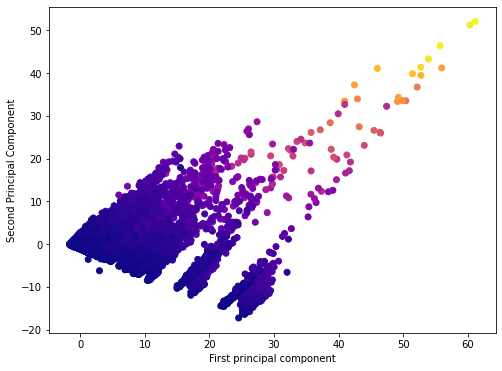

In [22]:
##plt.figure(figsize=(8,6))
##plt.scatter(data_pca[:,0],data_pca[:,1],c=df['NEW_CASES'],cmap='plasma')
##plt.xlabel('First principal component')
##plt.ylabel('Second Principal Component')